
## <font color="blue">Disciplina: Inteligência Artificial</font>

### <font color="red"><i>Previsão do Clima</i></font>
##### <font color="black">Neste Notebook será realizado o processo de análise e preparação dos dados do clima de Seattle e Budapest, além da aplicação de um modelo de regressão para prever a temperatura máxima.</font>


In [178]:
# Identificação do grupo:
# - Leonardo Henrique de Oliveira Matos, 10389516
# - Victor Junqueira Colombaro, 10395711

# Projeto de Previsão Climática
Este projeto tem como objetivo prever a temperatura máxima das cidades de Seattle (EUA) e Budapeste (Hungria) com base em variáveis climáticas e condições meteorológicas. Além disso, busca explorar como técnicas de aprendizado de máquina podem ser utilizadas para análise e interpretação de padrões nos dados climáticos dessas cidades.

## Objetivo
Construir modelos de regressão e classificação para prever e categorizar a temperatura máxima utilizando dados climáticos, e aplicar técnicas de clusterização para identificar padrões nos dados.


## Metodologia
1. **Carregamento dos Dados**:
   - Análise descritiva das variáveis.
   - Visualização gráfica para entender correlações e distribuições.

2. **Preparação dos Dados**:
   - Tratamento de valores ausentes.
   - Normalização das variáveis.
   - Categorização da variável `MaxTemp`.

3. **Modelagem**:
   - Regressão Linear.
   - Regressão com Random Forest.
   - Classificação com Random Forest e KNN.
   - Clusterização com K-Means.

4. **Avaliação**:
   - Avaliação de desempenho dos modelos com métricas apropriadas.
   - Discussão sobre generalização para outras regiões.


## 1. Carregamento dos Dados

Nesta seção, carregamos os dados das cidades de Seattle e Budapeste (Datasets Originais e Preparados).


In [179]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Carregar os datasets originais
seattle_original = pd.read_csv('Seattle_Sem_Ajuste.csv')
budapest_original = pd.read_csv('Budapest_Sem_Ajuste.csv')

# Carregar os datasets preparados
seattle_prepared = pd.read_csv('Seattle_Dataset.csv')
budapest_prepared = pd.read_csv('Budapest_Dataset.csv')

# Organizar as saídas para Markdown
from IPython.display import display, Markdown

# Dataset Original - Seattle
display(Markdown(f"### Dataset Original - Seattle\n"
                 f"- Dimensões: {seattle_original.shape}\n"
                 f"- Primeiras Linhas:\n\n"
                 f"{seattle_original.head().to_markdown()}"))

# Dataset Original - Budapeste
display(Markdown(f"### Dataset Original - Budapeste\n"
                 f"- Dimensões: {budapest_original.shape}\n"
                 f"- Primeiras Linhas:\n\n"
                 f"{budapest_original.head().to_markdown()}"))

# Dataset Preparado - Seattle
display(Markdown(f"### Dataset Preparado - Seattle\n"
                 f"- Dimensões: {seattle_prepared.shape}\n"
                 f"- Primeiras Linhas:\n\n"
                 f"{seattle_prepared.head().to_markdown()}"))

# Dataset Preparado - Budapeste
display(Markdown(f"### Dataset Preparado - Budapeste\n"
                 f"- Dimensões: {budapest_prepared.shape}\n"
                 f"- Primeiras Linhas:\n\n"
                 f"{budapest_prepared.head().to_markdown()}"))


### Dataset Original - Seattle
- Dimensões: (1461, 6)
- Primeiras Linhas:

|    | date       |   precipitation |   temp_max |   temp_min |   wind | weather   |
|---:|:-----------|----------------:|-----------:|-----------:|-------:|:----------|
|  0 | 2012-01-01 |             0   |       12.8 |        5   |    4.7 | drizzle   |
|  1 | 2012-01-02 |            10.9 |       10.6 |        2.8 |    4.5 | rain      |
|  2 | 2012-01-03 |             0.8 |       11.7 |        7.2 |    2.3 | rain      |
|  3 | 2012-01-04 |            20.3 |       12.2 |        5.6 |    4.7 | rain      |
|  4 | 2012-01-05 |             1.3 |        8.9 |        2.8 |    6.1 | rain      |

### Dataset Original - Budapeste
- Dimensões: (3654, 165)
- Primeiras Linhas:

|    |        DATE |   MONTH |   BASEL_cloud_cover |   BASEL_humidity |   BASEL_pressure |   BASEL_global_radiation |   BASEL_precipitation |   BASEL_sunshine |   BASEL_temp_mean |   BASEL_temp_min |   BASEL_temp_max |   BUDAPEST_cloud_cover |   BUDAPEST_humidity |   BUDAPEST_pressure |   BUDAPEST_global_radiation |   BUDAPEST_precipitation |   BUDAPEST_sunshine |   BUDAPEST_temp_mean |   BUDAPEST_temp_max |   DE_BILT_cloud_cover |   DE_BILT_wind_speed |   DE_BILT_wind_gust |   DE_BILT_humidity |   DE_BILT_pressure |   DE_BILT_global_radiation |   DE_BILT_precipitation |   DE_BILT_sunshine |   DE_BILT_temp_mean |   DE_BILT_temp_min |   DE_BILT_temp_max |   DRESDEN_cloud_cover |   DRESDEN_wind_speed |   DRESDEN_wind_gust |   DRESDEN_humidity |   DRESDEN_global_radiation |   DRESDEN_precipitation |   DRESDEN_sunshine |   DRESDEN_temp_mean |   DRESDEN_temp_min |   DRESDEN_temp_max |   DUSSELDORF_cloud_cover |   DUSSELDORF_wind_speed |   DUSSELDORF_wind_gust |   DUSSELDORF_humidity |   DUSSELDORF_pressure |   DUSSELDORF_global_radiation |   DUSSELDORF_precipitation |   DUSSELDORF_sunshine |   DUSSELDORF_temp_mean |   DUSSELDORF_temp_min |   DUSSELDORF_temp_max |   HEATHROW_cloud_cover |   HEATHROW_humidity |   HEATHROW_pressure |   HEATHROW_global_radiation |   HEATHROW_precipitation |   HEATHROW_sunshine |   HEATHROW_temp_mean |   HEATHROW_temp_min |   HEATHROW_temp_max |   KASSEL_wind_speed |   KASSEL_wind_gust |   KASSEL_humidity |   KASSEL_pressure |   KASSEL_global_radiation |   KASSEL_precipitation |   KASSEL_sunshine |   KASSEL_temp_mean |   KASSEL_temp_min |   KASSEL_temp_max |   LJUBLJANA_cloud_cover |   LJUBLJANA_wind_speed |   LJUBLJANA_humidity |   LJUBLJANA_pressure |   LJUBLJANA_global_radiation |   LJUBLJANA_precipitation |   LJUBLJANA_sunshine |   LJUBLJANA_temp_mean |   LJUBLJANA_temp_min |   LJUBLJANA_temp_max |   MAASTRICHT_cloud_cover |   MAASTRICHT_wind_speed |   MAASTRICHT_wind_gust |   MAASTRICHT_humidity |   MAASTRICHT_pressure |   MAASTRICHT_global_radiation |   MAASTRICHT_precipitation |   MAASTRICHT_sunshine |   MAASTRICHT_temp_mean |   MAASTRICHT_temp_min |   MAASTRICHT_temp_max |   MALMO_wind_speed |   MALMO_precipitation |   MALMO_temp_mean |   MALMO_temp_min |   MALMO_temp_max |   MONTELIMAR_wind_speed |   MONTELIMAR_humidity |   MONTELIMAR_pressure |   MONTELIMAR_global_radiation |   MONTELIMAR_precipitation |   MONTELIMAR_temp_mean |   MONTELIMAR_temp_min |   MONTELIMAR_temp_max |   MUENCHEN_cloud_cover |   MUENCHEN_wind_speed |   MUENCHEN_wind_gust |   MUENCHEN_humidity |   MUENCHEN_pressure |   MUENCHEN_global_radiation |   MUENCHEN_precipitation |   MUENCHEN_sunshine |   MUENCHEN_temp_mean |   MUENCHEN_temp_min |   MUENCHEN_temp_max |   OSLO_cloud_cover |   OSLO_wind_speed |   OSLO_wind_gust |   OSLO_humidity |   OSLO_pressure |   OSLO_global_radiation |   OSLO_precipitation |   OSLO_sunshine |   OSLO_temp_mean |   OSLO_temp_min |   OSLO_temp_max |   PERPIGNAN_wind_speed |   PERPIGNAN_humidity |   PERPIGNAN_pressure |   PERPIGNAN_global_radiation |   PERPIGNAN_precipitation |   PERPIGNAN_temp_mean |   PERPIGNAN_temp_min |   PERPIGNAN_temp_max |   ROMA_cloud_cover |   ROMA_humidity |   ROMA_pressure |   ROMA_global_radiation |   ROMA_sunshine |   ROMA_temp_mean |   ROMA_temp_min |   ROMA_temp_max |   SONNBLICK_cloud_cover |   SONNBLICK_humidity |   SONNBLICK_global_radiation |   SONNBLICK_precipitation |   SONNBLICK_sunshine |   SONNBLICK_temp_mean |   SONNBLICK_temp_min |   SONNBLICK_temp_max |   STOCKHOLM_cloud_cover |   STOCKHOLM_pressure |   STOCKHOLM_precipitation |   STOCKHOLM_sunshine |   STOCKHOLM_temp_mean |   STOCKHOLM_temp_min |   STOCKHOLM_temp_max |   TOURS_wind_speed |   TOURS_humidity |   TOURS_pressure |   TOURS_global_radiation |   TOURS_precipitation |   TOURS_temp_mean |   TOURS_temp_min |   TOURS_temp_max |
|---:|------------:|--------:|--------------------:|-----------------:|-----------------:|-------------------------:|----------------------:|-----------------:|------------------:|-----------------:|-----------------:|-----------------------:|--------------------:|--------------------:|----------------------------:|-------------------------:|--------------------:|---------------------:|--------------------:|----------------------:|---------------------:|--------------------:|-------------------:|-------------------:|---------------------------:|------------------------:|-------------------:|--------------------:|-------------------:|-------------------:|----------------------:|---------------------:|--------------------:|-------------------:|---------------------------:|------------------------:|-------------------:|--------------------:|-------------------:|-------------------:|-------------------------:|------------------------:|-----------------------:|----------------------:|----------------------:|------------------------------:|---------------------------:|----------------------:|-----------------------:|----------------------:|----------------------:|-----------------------:|--------------------:|--------------------:|----------------------------:|-------------------------:|--------------------:|---------------------:|--------------------:|--------------------:|--------------------:|-------------------:|------------------:|------------------:|--------------------------:|-----------------------:|------------------:|-------------------:|------------------:|------------------:|------------------------:|-----------------------:|---------------------:|---------------------:|-----------------------------:|--------------------------:|---------------------:|----------------------:|---------------------:|---------------------:|-------------------------:|------------------------:|-----------------------:|----------------------:|----------------------:|------------------------------:|---------------------------:|----------------------:|-----------------------:|----------------------:|----------------------:|-------------------:|----------------------:|------------------:|-----------------:|-----------------:|------------------------:|----------------------:|----------------------:|------------------------------:|---------------------------:|-----------------------:|----------------------:|----------------------:|-----------------------:|----------------------:|---------------------:|--------------------:|--------------------:|----------------------------:|-------------------------:|--------------------:|---------------------:|--------------------:|--------------------:|-------------------:|------------------:|-----------------:|----------------:|----------------:|------------------------:|---------------------:|----------------:|-----------------:|----------------:|----------------:|-----------------------:|---------------------:|---------------------:|-----------------------------:|--------------------------:|----------------------:|---------------------:|---------------------:|-------------------:|----------------:|----------------:|------------------------:|----------------:|-----------------:|----------------:|----------------:|------------------------:|---------------------:|-----------------------------:|--------------------------:|---------------------:|----------------------:|---------------------:|---------------------:|------------------------:|---------------------:|--------------------------:|---------------------:|----------------------:|---------------------:|---------------------:|-------------------:|-----------------:|-----------------:|-------------------------:|----------------------:|------------------:|-----------------:|-----------------:|
|  0 | 2.00001e+07 |       1 |                   8 |             0.89 |           1.0286 |                     0.2  |                  0.03 |              0   |               2.9 |              1.6 |              3.9 |                      3 |                0.92 |              1.0268 |                        0.52 |                        0 |                 3.7 |                 -4.9 |                -0.7 |                     7 |                  2.5 |                   8 |               0.97 |             1.024  |                       0.11 |                    0.1  |                0   |                 6.1 |                3.5 |                8.1 |                     8 |                  3.2 |                 7.2 |               0.89 |                       0.09 |                    0.32 |                0   |                 1   |               -1.8 |                2   |                        8 |                     2.5 |                    5.9 |                  0.92 |                1.024  |                          0.12 |                       0.22 |                   0   |                    4.2 |                   2.5 |                   6.9 |                      7 |                0.94 |              1.0245 |                        0.18 |                     0    |                 0.4 |                  7   |                 4.9 |                10.8 |                 2.5 |                8.2 |              0.93 |            1.0237 |                      0.06 |                   0.13 |               0   |                3.5 |               1.5 |               5   |                       6 |                    0.4 |                 0.83 |               1.0294 |                         0.57 |                         0 |                  5.2 |                  -4.8 |                 -9.1 |                 -1.3 |                        8 |                     3.1 |                      7 |                  0.98 |                1.0251 |                          0.06 |                       0.17 |                   0   |                    5.6 |                   4.1 |                   6.9 |                2.5 |                  0.27 |               2.9 |              0.9 |              3.6 |                     3.8 |                  0.85 |                1.0269 |                          0.3  |                          0 |                    5.5 |                   2.5 |                   8.5 |                      8 |                   2.6 |                  9.4 |                0.91 |              1.0273 |                        0.2  |                     0.2  |                 0   |                  1.7 |                -0.5 |                 2.6 |                  7 |               0.9 |              5.1 |            0.94 |          1.013  |                    0.04 |                 0.6  |             0   |             -5   |            -8.6 |            -3.2 |                    4.4 |                 0.71 |               1.0267 |                         0.6  |                      0    |                  12.2 |                 10.3 |                 14   |                  0 |            0.72 |          1.0244 |                    0.92 |             8.4 |              1.6 |             3   |             8   |                       7 |                 0.89 |                         0.82 |                      1.34 |                  0   |                 -15.2 |                -17   |                -13.4 |                       8 |               1.0163 |                      0.17 |                  0   |                  -2.3 |                 -9.3 |                  0.7 |                1.6 |             0.97 |           1.0275 |                     0.25 |                  0.04 |               8.5 |              7.2 |              9.8 |
|  1 | 2.00001e+07 |       1 |                   8 |             0.87 |           1.0318 |                     0.25 |                  0    |              0   |               3.6 |              2.7 |              4.8 |                      8 |                0.94 |              1.0297 |                        0.14 |                        0 |                 0.4 |                 -3.6 |                -1.9 |                     8 |                  3.7 |                   9 |               0.97 |             1.0267 |                       0.11 |                    0    |                0   |                 7.3 |                5.4 |                8.7 |                     7 |                  4   |                 8.8 |               0.89 |                       0.23 |                    0    |                0.4 |                 2.5 |                1.4 |                4   |                        6 |                     3   |                    7.4 |                  0.87 |                1.0283 |                          0.19 |                       0    |                   0.7 |                    6.5 |                   2.7 |                   7.9 |                      7 |                0.89 |              1.0253 |                        0.2  |                     0.02 |                 0.7 |                  7.9 |                 5   |                11.5 |                 2.9 |                9.6 |              0.92 |            1.029  |                      0.33 |                   0    |               2.9 |                2.3 |               0.3 |               4.7 |                       6 |                    0.4 |                 0.76 |               1.031  |                         0.59 |                         0 |                  5   |                  -0.9 |                 -4.9 |                  2   |                        7 |                     3.8 |                      9 |                  0.95 |                1.0286 |                          0.14 |                       0    |                   0   |                    6.2 |                   4.2 |                   7.5 |                3.8 |                  0    |               3.7 |              1   |              5.4 |                     5.8 |                  0.82 |                1.0287 |                          0.54 |                          0 |                    8.3 |                   6.8 |                   9.8 |                      6 |                   2.1 |                  8.2 |                0.9  |              1.0321 |                        0.66 |                     0    |                 6.1 |                  1.9 |                -0.2 |                 5.8 |                  6 |               1.9 |              5.7 |            0.94 |          1.0076 |                    0.11 |                 0    |             1.6 |             -0.8 |            -6.7 |             2.4 |                    2.9 |                 0.67 |               1.0278 |                         0.96 |                      0    |                   9.8 |                  5.1 |                 14.6 |                  2 |            0.74 |          1.0263 |                    0.81 |             6.5 |              4.2 |             0   |             8.4 |                       5 |                 0.86 |                         0.6  |                      0.39 |                  2.8 |                 -13.7 |                -15   |                -12.3 |                       8 |               1.0108 |                      0.2  |                  0   |                   1.3 |                  0.5 |                  2   |                2   |             0.99 |           1.0293 |                     0.17 |                  0.16 |               7.9 |              6.6 |              9.2 |
|  2 | 2.00001e+07 |       1 |                   5 |             0.81 |           1.0314 |                     0.5  |                  0    |              3.7 |               2.2 |              0.1 |              4.8 |                      6 |                0.95 |              1.0295 |                        0.19 |                        0 |                 0   |                 -0.8 |                 1.1 |                     8 |                  6.1 |                  13 |               0.94 |             1.0203 |                       0.11 |                    0.45 |                0   |                 8.4 |                6.4 |                9.6 |                     7 |                  5.4 |                12.1 |               0.79 |                       0.18 |                    0    |                0   |                 4.2 |                1.3 |                5.1 |                        7 |                     5.5 |                   14.3 |                  0.78 |                1.0235 |                          0.12 |                       0.28 |                   0   |                    7.7 |                   6.9 |                   9.1 |                      8 |                0.91 |              1.0186 |                        0.13 |                     0.6  |                 0   |                  9.4 |                 7.2 |                 9.5 |                 4.8 |               11.9 |              0.9  |            1.0251 |                      0.2  |                   0.01 |               0   |                3.5 |               2.2 |               4.6 |                       6 |                    0.3 |                 0.83 |               1.0309 |                         0.51 |                         0 |                  2.4 |                  -0.3 |                 -1.8 |                  3.3 |                        7 |                     7.4 |                     14 |                  0.87 |                1.0236 |                          0.15 |                       0.02 |                   0.9 |                    6.8 |                   6.1 |                   7.9 |                4.3 |                  0.06 |               5.6 |              4   |              6.9 |                     0.4 |                  0.92 |                1.0316 |                          0.53 |                          0 |                    3.2 |                  -2.1 |                   8.5 |                      7 |                   2.1 |                  6.9 |                0.92 |              1.0317 |                        0.28 |                     0    |                 0.4 |                 -0.4 |                -3.3 |                 0.9 |                  6 |               1.7 |              8.7 |            0.88 |          1.0016 |                    0.04 |                 0    |             0   |              1.2 |            -1.1 |             3.8 |                    2.5 |                 0.85 |               1.0288 |                         0.93 |                      0    |                   8.6 |                  4.1 |                 13.2 |                  0 |            0.77 |          1.0288 |                    0.89 |             0   |              3.8 |            11.1 |            21.1 |                       3 |                 0.41 |                         0.81 |                      0    |                  5.1 |                  -9.2 |                -12.5 |                 -5.8 |                       7 |               1.0071 |                      0.08 |                  1.8 |                   0.8 |                 -1   |                  2.8 |                3.4 |             0.91 |           1.0267 |                     0.27 |                  0    |               8.1 |              6.6 |              9.6 |
|  3 | 2.00001e+07 |       1 |                   7 |             0.79 |           1.0262 |                     0.63 |                  0.35 |              6.9 |               3.9 |              0.5 |              7.5 |                      8 |                0.94 |              1.0252 |                        0.21 |                        0 |                 0   |                 -1   |                 0.1 |                     7 |                  3.8 |                  15 |               0.94 |             1.0142 |                       0.11 |                    1.09 |                0   |                 6.4 |                4.3 |                9.4 |                     8 |                  6   |                14.4 |               0.88 |                       0.11 |                    0.22 |                0   |                 4.4 |                3.4 |                5.2 |                        7 |                     6   |                   16.8 |                  0.87 |                1.0162 |                          0.12 |                       0.97 |                   0   |                    7.8 |                   6.6 |                   9.2 |                      5 |                0.89 |              1.0148 |                        0.34 |                     0.02 |                 2.9 |                  7   |                 4.4 |                11   |                 4.5 |               12.7 |              0.94 |            1.0174 |                      0.06 |                   0.44 |               0   |                4.8 |               3.5 |               5.6 |                       2 |                    0.4 |                 0.88 |               1.0262 |                         0.7  |                         0 |                  3.5 |                  -3.6 |                 -6.1 |                  0.4 |                        8 |                     7.2 |                     15 |                  0.92 |                1.0165 |                          0.07 |                       1.33 |                   0   |                    7.3 |                   6.1 |                   9   |                3.9 |                  0.75 |               4.5 |              3   |              6.4 |                     1.1 |                  0.85 |                1.0274 |                          0.64 |                          0 |                    7.2 |                   2.3 |                  12.1 |                      6 |                   2.7 |                 11.7 |                0.75 |              1.026  |                        0.58 |                     0.04 |                 4.5 |                  3.8 |                -2.8 |                 6.6 |                  1 |               3.4 |             11.8 |            0.58 |          0.9982 |                    0.13 |                 0    |             5.3 |              2.1 |            -0.5 |             5.1 |                    1.5 |                 0.85 |               1.0269 |                         0.56 |                      0.02 |                   8.6 |                  4.3 |                 12.8 |                  1 |            0.85 |          1.0273 |                    0.89 |             8.2 |              6   |             2   |            10   |                       1 |                 0.25 |                         1.05 |                      0.11 |                  8.7 |                  -5.6 |                 -7   |                 -4.2 |                       2 |               0.9947 |                      0    |                  5   |                   3.5 |                  2.5 |                  4.6 |                4.9 |             0.95 |           1.0222 |                     0.11 |                  0.44 |               8.6 |              6.4 |             10.8 |
|  4 | 2.00001e+07 |       1 |                   5 |             0.9  |           1.0246 |                     0.51 |                  0.07 |              3.7 |               6   |              3.8 |              8.6 |                      5 |                0.88 |              1.0235 |                        0.43 |                        0 |                 0.8 |                  0.2 |                 3.9 |                     3 |                  4   |                  12 |               0.9  |             1.0183 |                       0.48 |                    0    |                6.5 |                 4.4 |                1.4 |                7.4 |                     2 |                  5.6 |                15.8 |               0.76 |                       0.49 |                    0    |                5.7 |                 1.8 |               -0.5 |                6.9 |                        4 |                     4.5 |                   11.2 |                  0.8  |                1.0203 |                          0.51 |                       0    |                   6.5 |                    5.2 |                   0.4 |                   8.6 |                      5 |                0.85 |              1.0142 |                        0.25 |                     0.08 |                 1.3 |                  6.4 |                 1.9 |                10.8 |                 2.4 |                8.8 |              0.84 |            1.021  |                      0.48 |                   0    |               6.7 |                2.3 |               0.2 |               6.3 |                       4 |                    0.6 |                 0.85 |               1.0271 |                         0.57 |                         0 |                  4.6 |                  -3   |                 -6.1 |                  1.1 |                        4 |                     4.1 |                     10 |                  0.87 |                1.0205 |                          0.44 |                       0    |                   6.2 |                    5.2 |                   0.6 |                   8.4 |                3.2 |                  0.03 |               3.8 |              2.5 |              5.5 |                     3.4 |                  0.82 |                1.0234 |                          0.7  |                          0 |                    8.2 |                   1.5 |                  14.8 |                      5 |                   3.3 |                 13.2 |                0.87 |              1.0248 |                        0.26 |                     0    |                 0.2 |                  5.3 |                 4.3 |                 7.3 |                  8 |               1.2 |              5.7 |            0.94 |          1.0055 |                    0.05 |                 0.06 |             0   |             -0.7 |            -4   |             0.5 |                    2.6 |                 0.74 |               1.0219 |                         0.83 |                      0.02 |                   9.2 |                  3.6 |                 14.9 |                  2 |            0.92 |          1.0238 |                    0.74 |             7.5 |              5   |            -1.2 |            11.2 |                       4 |                 0.77 |                         0.69 |                      0.17 |                  3.4 |                  -7.6 |                 -9.4 |                 -5.8 |                       5 |               1.0072 |                      0    |                  2.2 |                  -0.6 |                 -1.8 |                  2.9 |                3.6 |             0.95 |           1.0209 |                     0.39 |                  0.04 |               8   |              6.4 |              9.5 |

### Dataset Preparado - Seattle
- Dimensões: (1461, 6)
- Primeiras Linhas:

|    | date       |   maxtemp |   mintemp |   weather_rain |   weather_snow |   weather_sun |
|---:|:-----------|----------:|----------:|---------------:|---------------:|--------------:|
|  0 | 2012-01-01 |      12.8 |       5   |              0 |              0 |             0 |
|  1 | 2012-01-02 |      10.6 |       2.8 |              1 |              0 |             0 |
|  2 | 2012-01-03 |      11.7 |       7.2 |              1 |              0 |             0 |
|  3 | 2012-01-04 |      12.2 |       5.6 |              1 |              0 |             0 |
|  4 | 2012-01-05 |       8.9 |       2.8 |              1 |              0 |             0 |

### Dataset Preparado - Budapeste
- Dimensões: (1461, 6)
- Primeiras Linhas:

|    |        date |   maxtemp |   mintemp |   weather_rain |   weather_snow |   weather_sun |
|---:|------------:|----------:|----------:|---------------:|---------------:|--------------:|
|  0 | 2.00001e+07 |      -0.7 |      -4.9 |              0 |            nan |           3.7 |
|  1 | 2.00001e+07 |      -1.9 |      -3.6 |              0 |            nan |           0.4 |
|  2 | 2.00001e+07 |       1.1 |      -0.8 |              0 |            nan |           0   |
|  3 | 2.00001e+07 |       0.1 |      -1   |              0 |            nan |           0   |
|  4 | 2.00001e+07 |       3.9 |       0.2 |              0 |            nan |           0.8 |


### **Descrição dos Dados**
O dataset utilizado contém as seguintes colunas:

- **`date`**: Data de registro das observações.
- **`MaxTemp`**: Temperatura máxima registrada no dia (em °C).
- **`MinTemp`**: Temperatura mínima registrada no dia (em °C).
- **`weather_rain`**: Indicador binário (0 ou 1) para dias com ocorrência de chuva.
- **`weather_sun`**: Indicador binário (0 ou 1) para dias predominantemente ensolarados.
- **`weather_snow`**: Indicador binário (0 ou 1) para dias com ocorrência de neve.



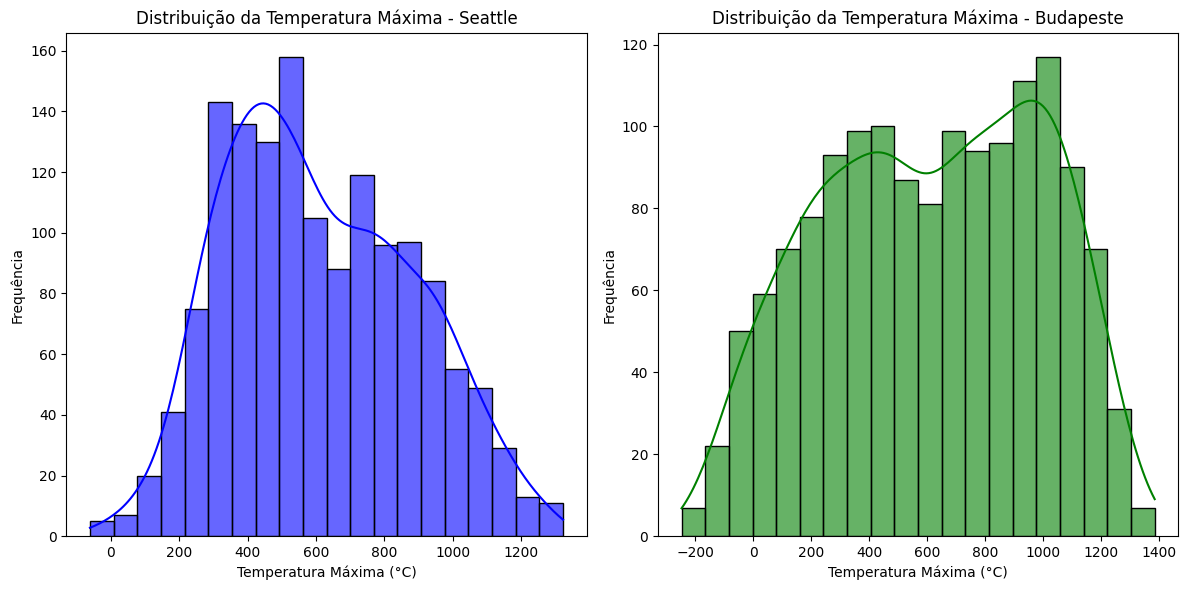

In [180]:
# Reverter a normalização
seattle_prepared['MaxTemp_original'] = seattle_prepared['maxtemp'] * (max_temp_seattle - min_temp_seattle) + min_temp_seattle
budapest_prepared['MaxTemp_original'] = budapest_prepared['maxtemp'] * (max_temp_budapest - min_temp_budapest) + min_temp_budapest

# Histogramas corrigidos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(seattle_prepared['MaxTemp_original'], kde=True, bins=20, color='blue', alpha=0.6)
plt.title("Distribuição da Temperatura Máxima - Seattle")
plt.xlabel("Temperatura Máxima (°C)")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
sns.histplot(budapest_prepared['MaxTemp_original'], kde=True, bins=20, color='green', alpha=0.6)
plt.title("Distribuição da Temperatura Máxima - Budapeste")
plt.xlabel("Temperatura Máxima (°C)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()



# 2. Preparação dos Dados
##Tratamento de Valores Ausentes.

Nesta etapa, os valores ausentes (NaN) são substituídos pela média das colunas numéricas, garantindo que o dataset esteja completo e pronto para análise. A coluna dateé ignorada nesse processo, pois não é relevante para operações numéricas.


In [181]:
# 1. Tratamento de valores ausentes
def handle_missing_values(data):
    print("\nTratamento de Valores Ausentes:")
    print(data.isnull().sum())  # Verificar valores ausentes
    # Verificar se a coluna 'date' existe antes de ignorá-la
    if 'date' in data.columns:
        numeric_data = data.drop(columns=['date'])
    else:
        numeric_data = data
    numeric_data = numeric_data.fillna(numeric_data.mean())  # Substituir valores ausentes pela média
    data.update(numeric_data)  # Atualizar apenas as colunas numéricas no dataset original
    return data

# Aplicar ao Dataset de Seattle e Budapeste
seattle_prepared = handle_missing_values(seattle_prepared)
budapest_prepared = handle_missing_values(budapest_prepared)



Tratamento de Valores Ausentes:
date                0
maxtemp             0
mintemp             0
weather_rain        0
weather_snow        0
weather_sun         0
MaxTemp_original    0
dtype: int64

Tratamento de Valores Ausentes:
date                   0
maxtemp                0
mintemp                0
weather_rain           0
weather_snow        1461
weather_sun            0
MaxTemp_original       0
dtype: int64


##Normalização das Variáveis

As colunas numéricas MinTemp e MaxTemp são normalizadas para o intervalo [0, 1] utilizando Min-Max Scaling. Isso garante que todas as variáveis estejam na mesma escala, evitando distorções no treinamento de modelos de aprendizado de máquina.

In [182]:
from sklearn.preprocessing import MinMaxScaler

# 2. Normalização das variáveis
def normalize_data(data, columns):
    print("\nNormalização das Variáveis:")
    scaler = MinMaxScaler()
    data[columns] = scaler.fit_transform(data[columns])  # Normalizar apenas as colunas especificadas
    print(data[columns].head())  # Visualizar os primeiros resultados normalizados
    return data

# Variáveis numéricas para normalizar (excluindo 'date')
numeric_cols = ['mintemp', 'maxtemp']

# Aplicar normalização aos Datasets
seattle_prepared = normalize_data(seattle_prepared, numeric_cols)
budapest_prepared = normalize_data(budapest_prepared, numeric_cols)



Normalização das Variáveis:
    mintemp   maxtemp
0  0.476378  0.387097
1  0.389764  0.327957
2  0.562992  0.357527
3  0.500000  0.370968
4  0.389764  0.282258

Normalização das Variáveis:
    mintemp   maxtemp
0  0.087302  0.134396
1  0.121693  0.107062
2  0.195767  0.175399
3  0.190476  0.152620
4  0.222222  0.239180


##Categorização da Variável MaxTemp

A variável contínua MaxTemp é convertida em categorias (Baixa, Moderada, Alta), criando a nova coluna MaxTempCategory. Isso permite análises qualitativas e facilita a aplicação de modelos de classificação.

In [183]:
# 3. Categorização da variável MaxTemp
def categorize_max_temp(data):
    print("\nCategorização da Variável MaxTemp:")
    conditions = [
        (data['maxtemp'] <= 0.33),
        (data['maxtemp'] > 0.33) & (data['maxtemp'] <= 0.66),
        (data['maxtemp'] > 0.66)
    ]
    categories = ['Baixa', 'Moderada', 'Alta']
    data['MaxTempCategory'] = np.select(conditions, categories)
    print(data[['maxtemp', 'MaxTempCategory']].head())
    return data

# Aplicar categorização aos Datasets
seattle_prepared = categorize_max_temp(seattle_prepared)
budapest_prepared = categorize_max_temp(budapest_prepared)



Categorização da Variável MaxTemp:
    maxtemp MaxTempCategory
0  0.387097        Moderada
1  0.327957           Baixa
2  0.357527        Moderada
3  0.370968        Moderada
4  0.282258           Baixa

Categorização da Variável MaxTemp:
    maxtemp MaxTempCategory
0  0.134396           Baixa
1  0.107062           Baixa
2  0.175399           Baixa
3  0.152620           Baixa
4  0.239180           Baixa



# 3. Aplicação do Modelo de Regressão
Será aplicado o modelo de regressão linear para prever a temperatura máxima (**temp_max**) com base nas outras variáveis.


In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_analysis(data, target, features, city_name):
    # Separar variáveis independentes (X) e dependente (y)
    X = data[features]
    y = data[target]

    # Divisão dos dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Regressão Linear
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    print(f"\nRegressão Linear - {city_name}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

# Aplicar regressão linear para Seattle e Budapeste
features = ['mintemp']  # Adicione outras variáveis relevantes, se necessário
target = 'maxtemp'
linear_regression_analysis(seattle_prepared, target, features, "Seattle")
linear_regression_analysis(budapest_prepared, target, features, "Budapest")



Regressão Linear - Seattle
Mean Squared Error (MSE): 0.01
R2 Score: 0.78

Regressão Linear - Budapest
Mean Squared Error (MSE): 0.00
R2 Score: 0.98


In [185]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regression(data, target, features, city_name):
    # Separar variáveis independentes (X) e dependente (y)
    X = data[features]
    y = data[target]

    # Divisão dos dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    print(f"\nRandom Forest Regressão - {city_name}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

# Aplicar regressão com Random Forest para Seattle e Budapeste
random_forest_regression(seattle_prepared, target, features, "Seattle")
random_forest_regression(budapest_prepared, target, features, "Budapest")



Random Forest Regressão - Seattle
Mean Squared Error (MSE): 0.01
R2 Score: 0.79

Random Forest Regressão - Budapest
Mean Squared Error (MSE): 0.00
R2 Score: 0.97


In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from IPython.display import display, Markdown

def classification_models_markdown(data, target, features, city_name):
    # Separar variáveis independentes (X) e dependente (y)
    X = data[features]
    y = data[target]

    # Divisão dos dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelos de classificação
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "KNN": KNeighborsClassifier()
    }

    # Gerar relatórios em Markdown
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Transformar em formato Markdown
        markdown_report = f"### {name} - {city_name}\n\n"
        markdown_report += "| Class | Precision | Recall | F1-Score | Support |\n"
        markdown_report += "|-------|-----------|--------|----------|---------|\n"

        for label, metrics in report.items():
            # Ignorar "macro avg" e "weighted avg"
            if isinstance(metrics, dict) and label not in ["macro avg", "weighted avg"]:
                markdown_report += f"| {label} | {metrics['precision']:.2f} | {metrics['recall']:.2f} | {metrics['f1-score']:.2f} | {metrics['support']:.0f} |\n"

        display(Markdown(markdown_report))

# Aplicar classificação para Seattle e Budapeste
features = ['mintemp', 'maxtemp']
target = 'MaxTempCategory'
classification_models_markdown(seattle_prepared, target, features, "Seattle")
classification_models_markdown(budapest_prepared, target, features, "Budapest")


### Random Forest - Seattle

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| Alta | 1.00 | 1.00 | 1.00 | 72 |
| Baixa | 1.00 | 1.00 | 1.00 | 75 |
| Moderada | 1.00 | 1.00 | 1.00 | 146 |


### KNN - Seattle

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| Alta | 1.00 | 0.97 | 0.99 | 72 |
| Baixa | 0.99 | 1.00 | 0.99 | 75 |
| Moderada | 0.99 | 0.99 | 0.99 | 146 |


### Random Forest - Budapest

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| Alta | 1.00 | 1.00 | 1.00 | 94 |
| Baixa | 1.00 | 1.00 | 1.00 | 81 |
| Moderada | 1.00 | 1.00 | 1.00 | 118 |


### KNN - Budapest

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| Alta | 1.00 | 0.99 | 0.99 | 94 |
| Baixa | 1.00 | 1.00 | 1.00 | 81 |
| Moderada | 0.99 | 1.00 | 1.00 | 118 |


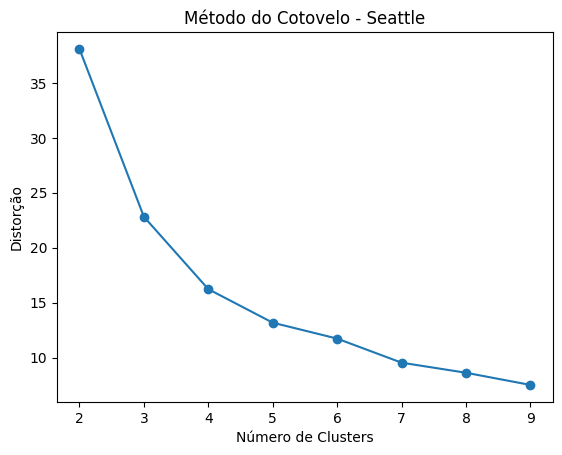

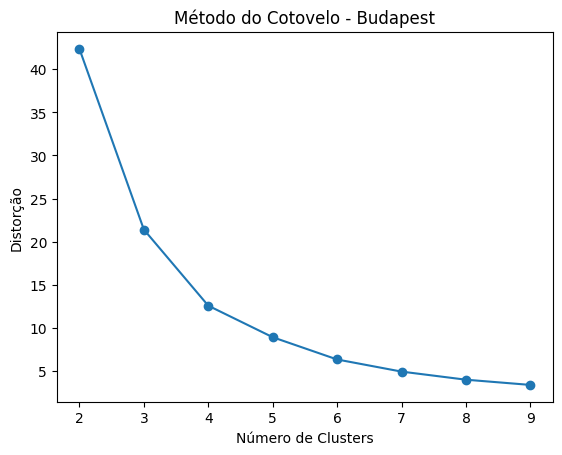

In [187]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_clustering(data, features, city_name):
    X = data[features]

    # Determinar o número ideal de clusters (Método do Cotovelo)
    distortions = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot do método do cotovelo
    plt.figure()
    plt.plot(range(2, 10), distortions, marker='o')
    plt.title(f"Método do Cotovelo - {city_name}")
    plt.xlabel("Número de Clusters")
    plt.ylabel("Distorção")
    plt.show()

    # Clusterização final com 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X)

# Aplicar K-Means para Seattle e Budapeste
features = ['mintemp', 'maxtemp']
kmeans_clustering(seattle_prepared, features, "Seattle")
kmeans_clustering(budapest_prepared, features, "Budapest")


#4. Avaliação:

Avaliação de desempenho dos modelos.
Discussão sobre generalização para outras regiões.

##Valores reais versus valores previstos

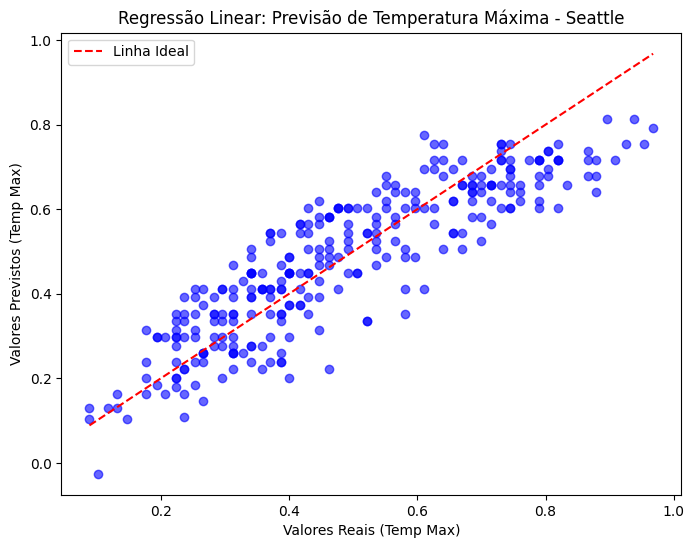

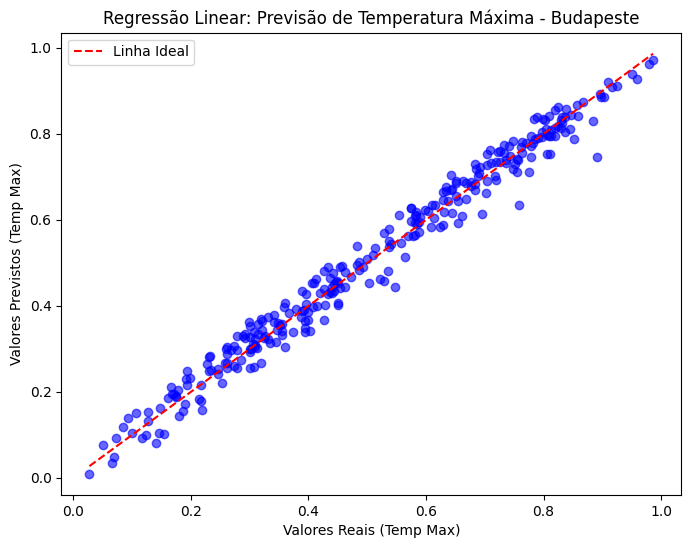

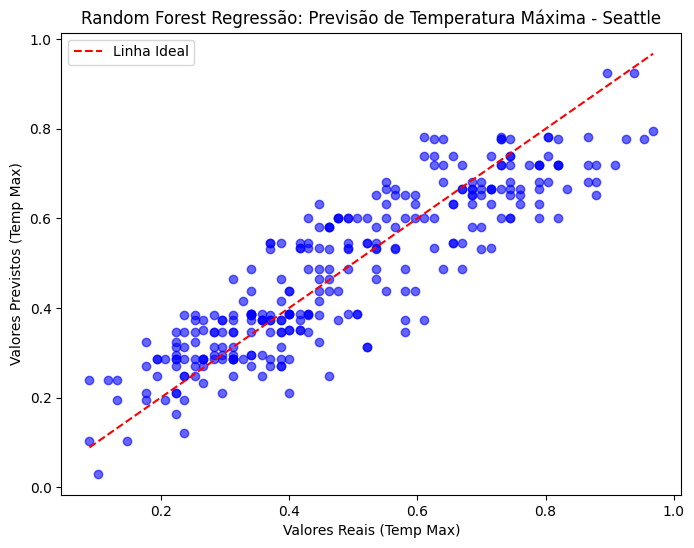

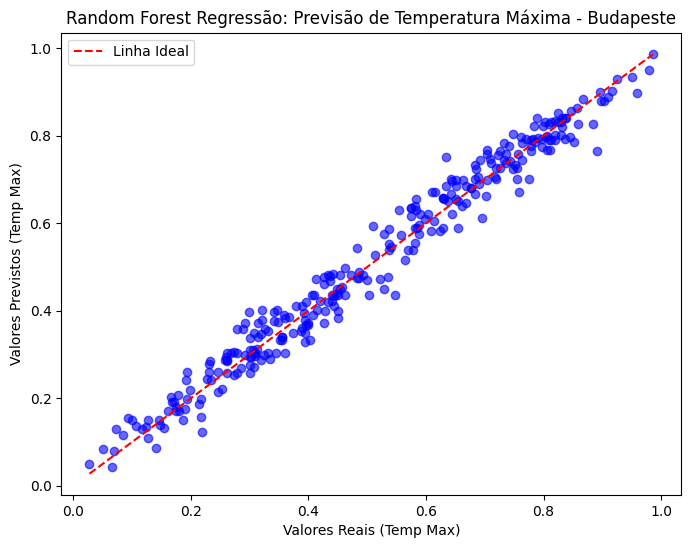

In [188]:
import matplotlib.pyplot as plt

def visualize_regression_results(y_test, y_pred, model_name, city_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha Ideal')
    plt.xlabel('Valores Reais (Temp Max)')
    plt.ylabel('Valores Previstos (Temp Max)')
    plt.title(f'{model_name}: Previsão de Temperatura Máxima - {city_name}')
    plt.legend()
    plt.show()

def evaluate_and_visualize_regression(data, target, features, model_name, city_name, model):
    # Separar variáveis independentes (X) e dependente (y)
    X = data[features]
    y = data[target]

    # Divisão dos dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinar o modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Avaliação do desempenho
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Apresentar resultados
    print("\n")

    # Visualizar resultados
    visualize_regression_results(y_test, y_pred, model_name, city_name)

# Aplicar aos dados
features = ['mintemp']
target = 'maxtemp'

# Regressão Linear
evaluate_and_visualize_regression(seattle_prepared, target, features, "Regressão Linear", "Seattle", LinearRegression())
evaluate_and_visualize_regression(budapest_prepared, target, features, "Regressão Linear", "Budapeste", LinearRegression())

# Random Forest Regressão
evaluate_and_visualize_regression(seattle_prepared, target, features, "Random Forest Regressão", "Seattle", RandomForestRegressor(random_state=42))
evaluate_and_visualize_regression(budapest_prepared, target, features, "Random Forest Regressão", "Budapeste", RandomForestRegressor(random_state=42))


##Plotagem de Resíduos

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para plotar resultados
def visualize_regression_results(y_test, y_pred, model_name, city_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha Ideal')
    plt.xlabel('Valores Reais (Temp Max)')
    plt.ylabel('Valores Previstos (Temp Max)')
    plt.title(f'{model_name}: Previsão de Temperatura Máxima - {city_name}')
    plt.legend()
    plt.show()

# Função para plotar resíduos
def plot_residuals(y_test, y_pred, model_name, city_name):
    residuals = y_test - y_pred  # Calcular resíduos

    # Gráfico de dispersão dos resíduos
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='green', alpha=0.6, label='Resíduos')
    plt.axhline(0, color='red', linestyle='--', label='Linha de Referência')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Resíduos')
    plt.title(f'{model_name}: Análise de Resíduos - {city_name}')
    plt.legend()
    plt.show()

    # Distribuição dos resíduos
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=20, color='purple', alpha=0.6)
    plt.axvline(0, color='red', linestyle='--', label='Média dos Resíduos')
    plt.title(f'{model_name}: Distribuição dos Resíduos - {city_name}')
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()


##Heatmap de correlação entre Variáveis

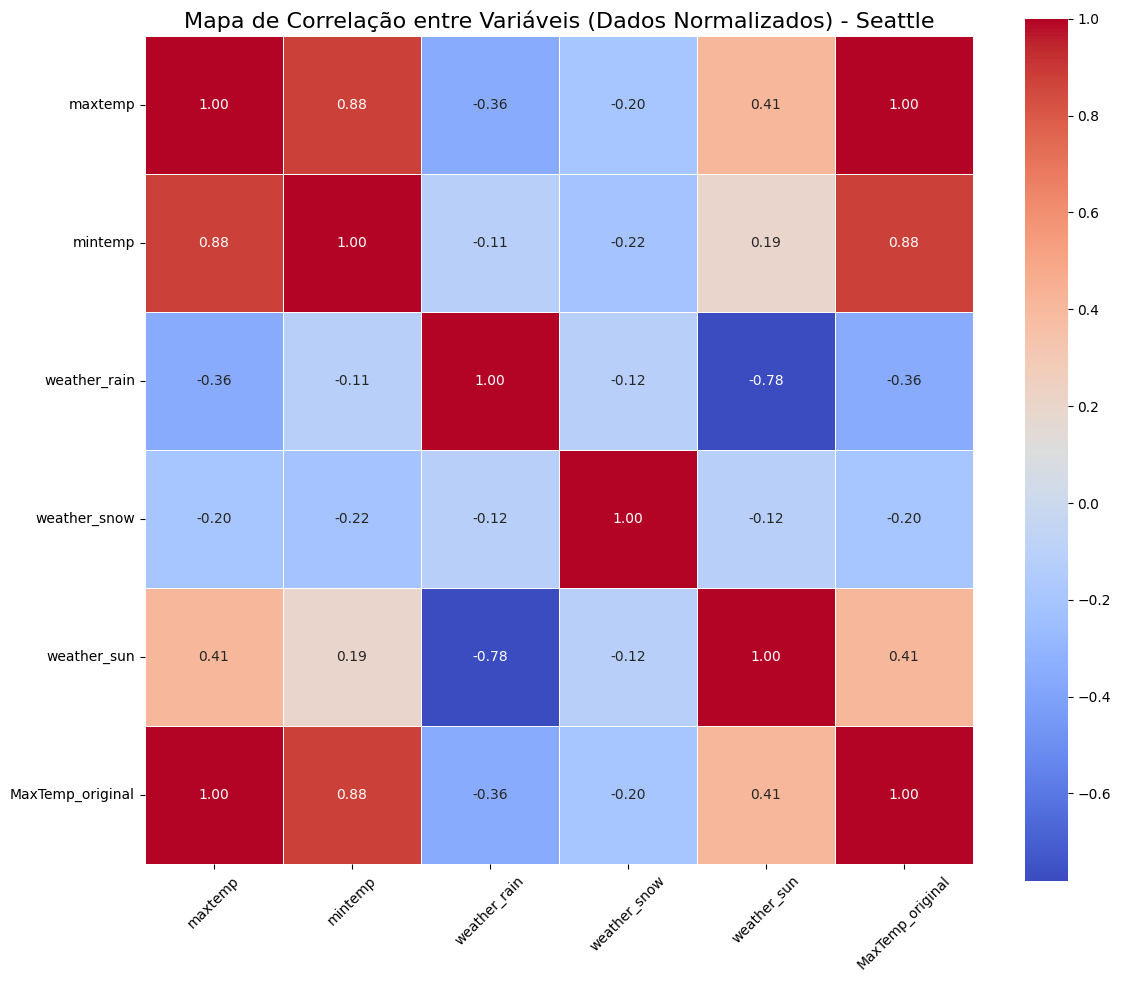

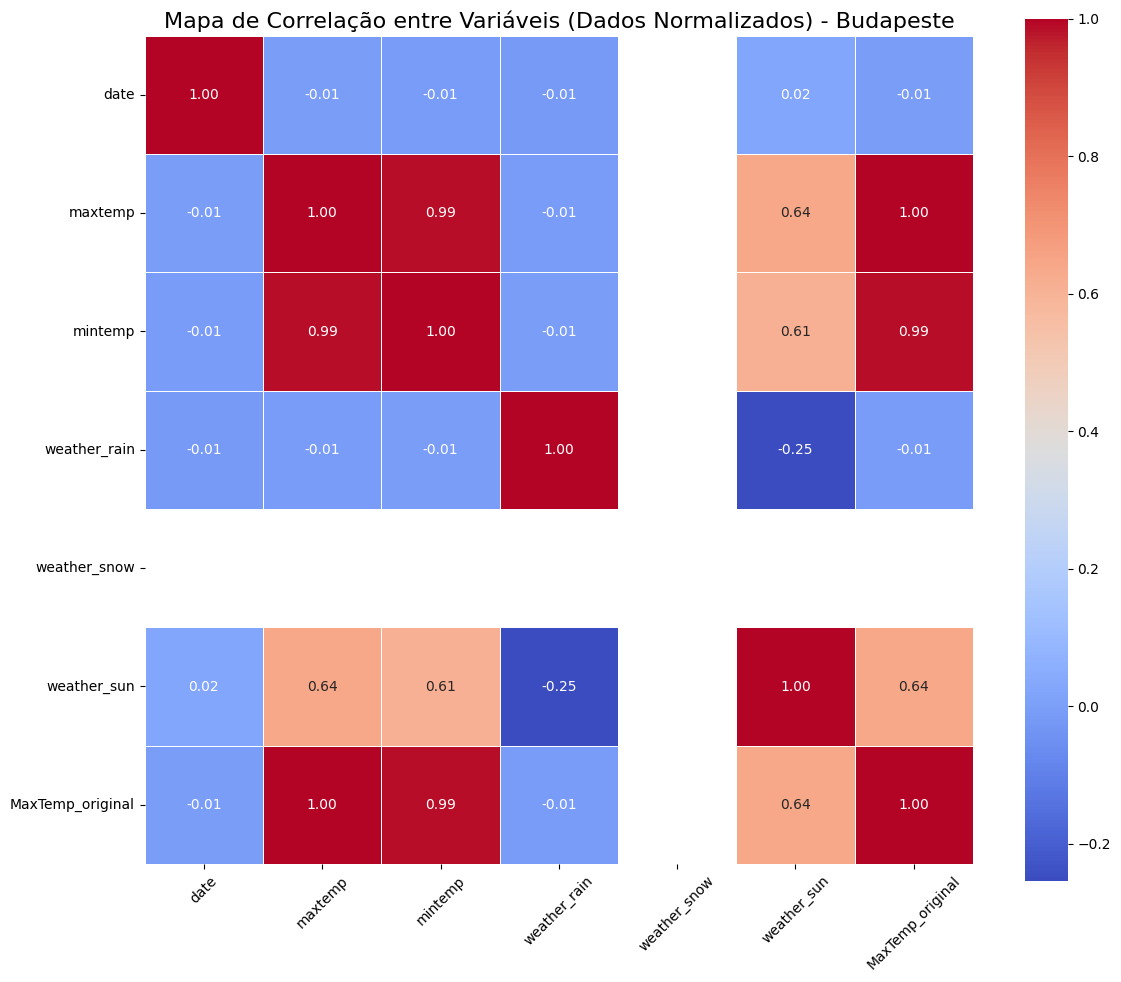

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas para Seattle
numeric_seattle = seattle_prepared.select_dtypes(include=['float64', 'int64'])

# Heatmap para Seattle
plt.figure(figsize=(12, 10))
correlation_matrix_seattle = numeric_seattle.corr()  # Calcular correlação para Seattle
sns.heatmap(correlation_matrix_seattle, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis (Dados Normalizados) - Seattle", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Selecionar apenas colunas numéricas para Budapeste
numeric_budapest = budapest_prepared.select_dtypes(include=['float64', 'int64'])

# Heatmap para Budapeste
plt.figure(figsize=(12, 10))
correlation_matrix_budapest = numeric_budapest.corr()  # Calcular correlação para Budapeste
sns.heatmap(correlation_matrix_budapest, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis (Dados Normalizados) - Budapeste", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##Discussão Final

###O gráfico de dispersão ilustra a relação entre os valores reais e os valores previstos pelo modelo. A linha vermelha representa a previsão perfeita, ou seja, onde os valores reais e previstos seriam iguais. Pontos próximos a essa linha indicam que o modelo teve um bom desempenho, enquanto desvios maiores revelam erros nas previsões. No caso das cidades de Seattle e Budapeste, os gráficos mostram que o modelo conseguiu capturar bem a tendência geral, mas alguns desvios ainda são perceptíveis, especialmente em extremos de temperatura.

###Na análise de resíduos, o gráfico deve exibir um padrão aleatório ao redor de zero, indicando que os erros do modelo não seguem um padrão sistemático. Padrões nos resíduos podem evidenciar problemas no modelo, como viés ou subajuste. Além disso, a distribuição dos resíduos foi avaliada para verificar se segue uma distribuição normal, o que é um indicativo de bom ajuste. Uma distribuição não normal dos resíduos pode sinalizar que o modelo não está capturando completamente as relações nos dados ou que há fatores importantes não considerados.

### Modelos treinados nessas cidades podem apresentar dificuldades ao serem aplicados em áreas tropicais ou regiões com alta variabilidade climática. A inclusão de variáveis adicionais, como umidade relativa e indicência solar, poderia melhorar significativamente a capacidade preditiva dos modelos e permitir uma maior generalização para outros contextos geográficos e climáticos.